In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf

In [3]:
colvar_A=np.loadtxt('../Data/plumed/partA/COLVAR',comments=['#'])
colvar_B=np.loadtxt('../Data/plumed/partB/COLVAR',comments=['#'])

traj_A=md.load_xtc('../Data/plumed/partA/traj_comp.xtc',top='../Data/plumed/partA/confout.gro')
traj_B=md.load_xtc('../Data/plumed/partB/traj_comp.xtc',top='../Data/plumed/partB/confout.gro')

In [4]:
phi_indices_A, phi_A=md.compute_phi(traj_A)
psi_indices_A, psi_A=md.compute_psi(traj_A)

phi_indices_B, phi_B=md.compute_phi(traj_B)
psi_indices_B, psi_B=md.compute_psi(traj_B)

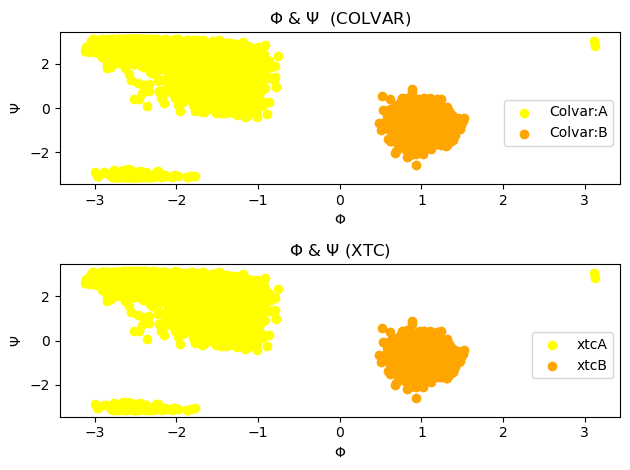

In [13]:
plt.subplot(211)
plt.scatter(colvar_A[:,1],colvar_A[:,2],label='Colvar:A',color='yellow')
plt.scatter(colvar_B[:,1],colvar_B[:,2],label='Colvar:B',color='orange')
plt.legend(bbox_to_anchor=(1,0.6))
plt.xlabel(r'$\Phi$')
plt.ylabel(r'$\Psi$')
plt.title(r'$\Phi$ & $\Psi$  (COLVAR)')


plt.subplot(212)
plt.scatter(phi_A[::10],psi_A[::10],label='xtcA',color='yellow')
plt.scatter(phi_B[::10],psi_B[::10],label='xtcB',color='orange')
plt.legend(bbox_to_anchor=(1,0.6))
plt.xlabel(r'$\Phi$')
plt.ylabel(r'$\Psi$')
plt.title(r'$\Phi$ & $\Psi$ (XTC)')

plt.tight_layout()
plt.savefig('../Figures/figure1.pdf')

In [14]:
phi_Asd=np.std(phi_A)
psi_Asd=np.std(psi_A)

phi_Bsd=np.std(phi_B)
psi_Bsd=np.std(psi_B)

print('phi_Asd='+str(phi_Asd))
print('psi_Asd='+str(psi_Asd))
print('phi_Bsd='+str(phi_Bsd))
print('psi_Bsd='+str(psi_Bsd))

phi_Asd=0.5538316
psi_Asd=1.024898
phi_Bsd=0.13238177
psi_Bsd=0.34453443


## Task3

In [15]:
task3_grid=np.loadtxt('../Data/Lugano_tutorial/lugano.grid.dat',comments=['#'])
task3_colvar=np.loadtxt('../Data/Lugano_tutorial/COLVAR',comments=['#'])
task3_hills=np.loadtxt('../Data/Lugano_tutorial/HILLS',comments=['#'])

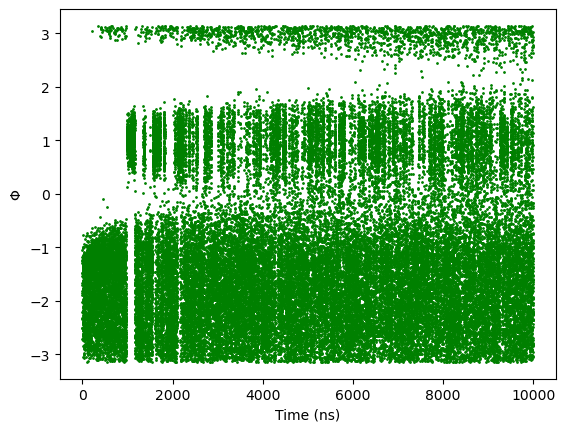

In [17]:
plt.scatter(task3_colvar[:,0][::10],task3_colvar[:,1][::10],s=1, color='green')
plt.xlabel('Time (ns)')
plt.ylabel(r'$\Phi$')
plt.savefig('../Figures/figure2.pdf')

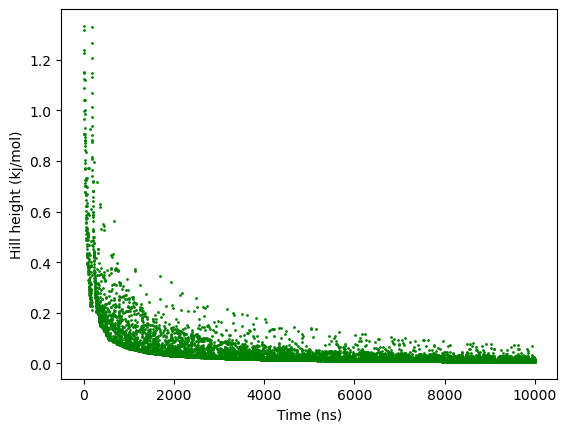

In [18]:
plt.scatter(task3_hills[:,0],task3_hills[:,3],s=1, color='green')
plt.xlabel('Time (ns)')
plt.ylabel('Hill height (kj/mol)')
plt.savefig('../Figures/figure3.pdf')

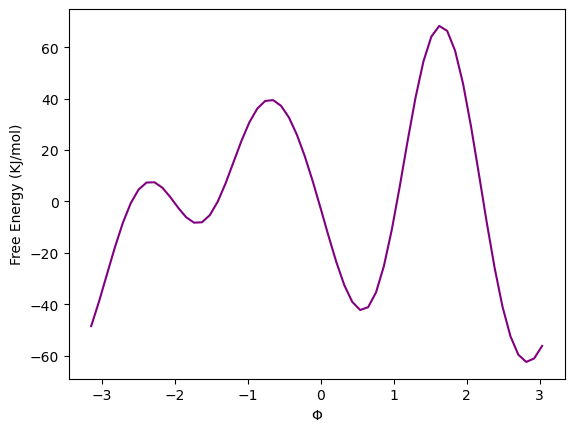

In [20]:
plt.plot(task3_grid[:,0],-task3_grid[:,2],color='purple')
plt.xlabel(r'$\Phi$')
plt.ylabel('Free Energy (KJ/mol)')
plt.savefig('../Figures/figure4.pdf')

## Task4

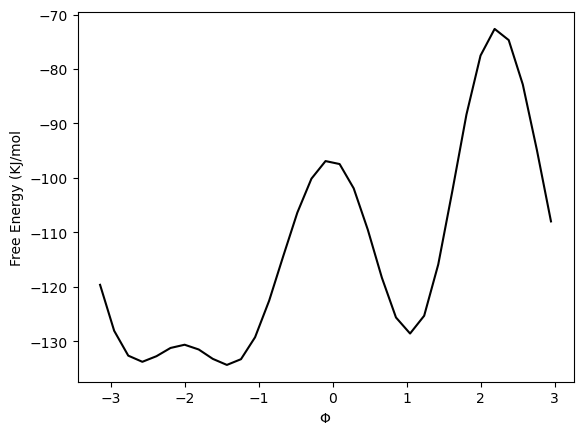

In [24]:
task4_fes=np.loadtxt('../Data/Lugano_tutorial/fes.dat',comments=['#'])
plt.plot(task4_fes[:,0],task4_fes[:,1],color='black')
plt.xlabel(r'$\Phi$')
plt.ylabel('Free Energy (KJ/mol')
plt.savefig('../Figures/figure5.pdf')

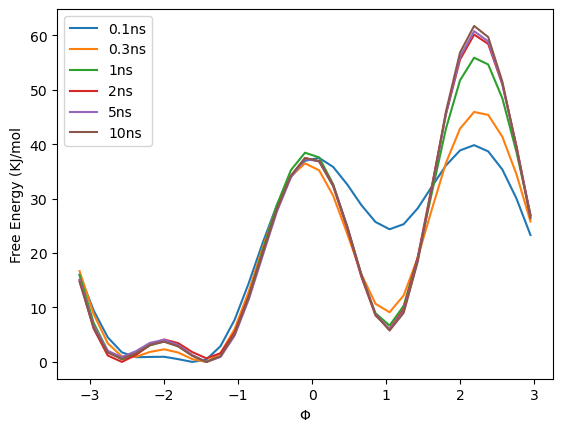

In [26]:
task4_01=np.loadtxt('../Data/Lugano_tutorial/fes_1.dat',comments=['#'])
task4_03=np.loadtxt('../Data/Lugano_tutorial/fes_3.dat',comments=['#'])
task4_10=np.loadtxt('../Data/Lugano_tutorial/fes_10.dat',comments=['#'])
task4_20=np.loadtxt('../Data/Lugano_tutorial/fes_20.dat',comments=['#'])
task4_50=np.loadtxt('../Data/Lugano_tutorial/fes_50.dat',comments=['#'])
task4_100=np.loadtxt('../Data/Lugano_tutorial/fes_100.dat',comments=['#'])
plt.plot(task4_01[:,0],task4_01[:,1],label='0.1ns')
plt.plot(task4_03[:,0],task4_03[:,1],label='0.3ns')
plt.plot(task4_10[:,0],task4_10[:,1],label='1ns')
plt.plot(task4_20[:,0],task4_20[:,1],label='2ns')
plt.plot(task4_50[:,0],task4_50[:,1],label='5ns')
plt.plot(task4_100[:,0],task4_100[:,1],label='10ns')
plt.xlabel('$\Phi$')
plt.ylabel('Free Energy (KJ/mol')
plt.legend()
plt.savefig('../Figures/figure6.pdf')

## Task6

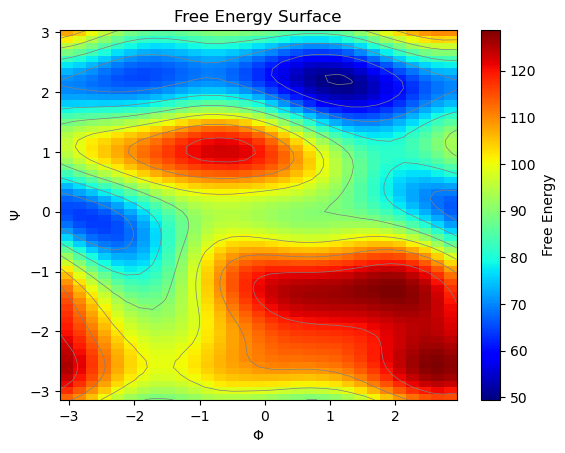

In [30]:
data = np.loadtxt('../Data/2Dmetadynamics/lugano.grid.dat',comments=['#'])
phi = data[:, 0]  # assuming the first column is phi
psi = data[:, 1]  # assuming the second column is psi
fes = data[:, 2]  # free energy values

unique_phi = np.unique(data[:, 0])
unique_psi = np.unique(data[:, 1])

fe_sur= np.empty((len(unique_phi), len(unique_psi)))

for row in data:
    phi_idx = np.where(unique_phi == row[0])[0][0]
    psi_idx = np.where(unique_psi == row[1])[0][0]
    fe_sur[phi_idx, psi_idx] = row[2]

plt.imshow(fe_sur, origin='lower', cmap='hot',aspect='auto',extent=[unique_psi.min(), unique_psi.max(),unique_phi.min(), unique_phi.max()])
plt.colorbar(label='Free Energy',cmap='hot')
CS = plt.contour(unique_psi, unique_phi, fe_sur, colors='grey', linewidths=0.5)
plt.xlabel('$\Phi$')
plt.ylabel('$\Psi$')
plt.title('Free Energy Surface')

plt.savefig('../Figures/figure7.png')
